# Soft line search

We want to find $\alpha$ which minimizes the objective function $f$
\begin{equation}
\xi(\alpha)=f(\mathbf{k}+\alpha\mathbf{h})
\end{equation}

The derivatives along any line $\mathbf{k}(\alpha)=\mathbf{k}+\alpha\mathbf{h}$ is
\begin{equation}
\frac{\text{d}}{\text{d}\alpha}=\sum_i\frac{\text{d}k_i(\alpha)}{\text{d}\alpha}\frac{\partial}{\partial k_i}=\sum_i h_i\frac{\partial}{\partial k_i}=\mathbf{h}^\top\nabla
\end{equation}

Hence,
\begin{align}
\frac{\text{d}f}{\text{d}\alpha}&=\mathbf{h}^\top\nabla f=\nabla f^\top\mathbf{h}\\
       &=\mathbf{h}^\top\mathbf{g(\mathbf{k}+\alpha\mathbf{h})}=\mathbf{g}(\mathbf{k}+\alpha\mathbf{h})^\top\mathbf{h}
\end{align}

The curvature along the line is
\begin{align}
\frac{\text{d}^2f}{\text{d}\alpha^2}&=\frac{\text{d}}{\text{d}\alpha}\frac{\text{d}f}{\text{d}\alpha}=\mathbf{h}^\top\nabla\left(\nabla f^\top\mathbf{h}\right)=\mathbf{h}^\top\nabla^2f\mathbf{h}\\
&=\mathbf{h}^\top\mathbf{H}(\mathbf{k}+\alpha\mathbf{h})\mathbf{h}
\end{align}

So
\begin{equation}
\xi(0)=f(\mathbf{k})
\end{equation}
\begin{equation}
\xi'(0)=\mathbf{h}^\top\mathbf{g}(\mathbf{k})
\end{equation}

The Wolfe-Powell conditions accepting $\alpha$ are
\begin{equation}
\xi(\alpha)\leq \xi(0)+\rho \xi'(0)\alpha
\end{equation}
and 
\begin{equation}
\xi'(\alpha)\geq\sigma \xi'(0)
\end{equation}
with $0<\rho<0.5$ and $\rho<\sigma<1$. Usually, $\rho=0.001$ and $\sigma=0.1$.

Hence, it should be
\begin{equation}
f(\mathbf{k}+\alpha\mathbf{h})\leq f(\mathbf{k})+\rho\mathbf{h}^\top\mathbf{g}(\mathbf{k})\alpha
\end{equation}
and
\begin{equation}
\mathbf{h}^\top\mathbf{g}(\mathbf{k}+\alpha\mathbf{h})\geq\sigma\mathbf{h}^\top\mathbf{g}(\mathbf{k})
\end{equation}



In practice two-sided test is preferred.
\begin{equation}
\vert f'(\alpha)\vert\leq-\sigma f'(0)
\end{equation}

R.Fletcher (2000)

## Algorithm of line search

1. Bracketing phase:

Find a bracket, that is a non-trivial interval which is known to contain an interval of acceptable points.

2. Sectioning phase:

The bracket is sectioned so as to generate a sequence of brackets whose length tends to zero.

The second order polynormial
\begin{equation}
g(t) = f(a) + f'(a)(t-a) + c(t-a)^2
\end{equation}
satisfies $g(a) = f(a)$, $g'(a) = f'(a)$, and $g(b) = f(b)$.

We can calculate $c$ as
\begin{equation}
c=\frac{f(b)-f(a)-f'(a)(b-a)}{(b-a)^2}
\end{equation}
If $c>0$, then $g(t)$ is minimum at $a-\frac{f'(a)}{2c}\in[a, b]$

If $c>0$, then $\alpha=a-\frac{f'(a)}{2c}$ and $\alpha=\frac{a+b}{2}$ otherwise.

## Cubic Hermite spline
Cubic polynomial interpolating with $\xi(\alpha_i), \xi'(\alpha_i), \xi(\alpha_{i-1})$, and $\xi'(\alpha_{i-1})$ can be done with cubic Hermite spline.

In [40]:
def quadratic_interpolate(x1, x2, a, b, fa, fb, dfa):
    def qp(x):
        return fa + dfa * (x - a) + (fb - fa - (b - a) * dfa) * (x - a)**2 / (b - a)**2           
    fit = minimize(qp, x0=a, bounds=((x1,x2),))
    return fit.x

In [46]:
def qp_test(x, a, b, fa, fb, dfa):
    return fa + dfa * (x - a) + (fb - fa - (b - a) * dfa) * (x - a)**2 / (b - a)**2 

In [68]:
x = np.linspace(-2, 2, 100)
a = -3
b = 2
fa = 2
fb = 2
dfa = -2

In [70]:
quadratic_interpolate(-2, 2, a, b, fa, fb, dfa)

array([-0.50000001])

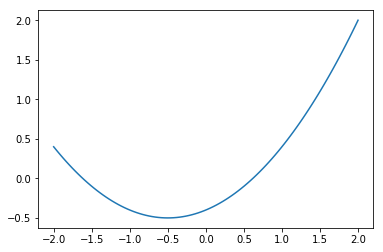

In [69]:
plt.plot(x, qp_test(x, a, b, fa, fb, dfa))

In [ ]:
phi, yhat, t, params, n, p, N, Q, S_old, scalar, delta, *args)

Y, H, g, S, r, fail

```python
print "Hello World"
```

In [ ]:
import numpy as np
from numpy import linalg as LA

from solve_tools import eval_objective_func

def soft_linesearch(h, g, phi, yhat, t, params, n, p, N, Q, S_old, scalar, delta, amax, kmax, *args):
    rho = 0.001
    sigma = 0.1
    df0 = h @ g
    f0 = S_old
    
    
    if df0 >= -10 * np.finfo(float).eps * LA.norm(h, 2) * LA.norm(g, 2):
        return 0
    
    a = 0
    b = min(1, amax)
    
    # bracketing phase
    while True:
        Y, H, gb, fb, _, fail = eval_objective_func(phi, yhat, t, params + b * h, n, p, N, Q, S_old, scalar, delta, *args)
        if fail == -1: # integration failed
            break
        dfb = h @ gb
        if fb < f0 + rho * df0 * b and dfb < sigma * df0 and b < amax and k < kmax:
            k += 1
            a = b
            fa = fb
            dfa = dfb
            
            if 2.5 * b >= amax:
                b = amax
            else:
                b *= 2
        else:
            break
    
    alpha = b
    falpha = fb
    dfalpha = dfb
    # sectioning phase
    while True:
        if (falpha > f0 + rho * df0 * alpha or dfalpha < sigma * df0) and k < kmax:
            k += 1
            refine()
        else:
            break
            
    if falpha > f0:
        alpha = 0
        
    def refine():
        D = b - a
        c = (fb - fa - D * dfa) / D**2

        if c > 0:
            alpha = a - dfa / (2 * c)
            alpha = min(max(alpha, a + 0.1 * D), b - 0.1 * D)
        else:
            alpha = (a + b) / 2

        Y, H, galpha, falpha, _, fail = eval_objective_func(phi, yhat, t, k + alpha * h, n, p, N, Q, S_old, scalar, delta, *args)

        dfalpha = h @ gam
        if fam < f0 + rho * df0 * alpha:
            a = alpha
            fa = falpha
            dfa = dfalpha
        else:
            b = alpha
            fb = falpha
            dfb = dfalpha
    
    params += alpha * h
            
    return alpha, Y, H, galpha, falpha, fail           

In [13]:
import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([2, 5])
np.dot(b, np.dot(a, b))
np.finfo(float).eps

2.220446049250313e-16

In [16]:
fail = 0
if fail:
    print('true')